In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/devbatrax/fracture-detection-using-x-ray-images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mishraswag2804
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/devbatrax/fracture-detection-using-x-ray-images


100%|██████████| 172M/172M [00:00<00:00, 1.17GB/s]

In [ ]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset , dataloader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:

#GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device : {device}")

Using device : cuda


In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader


In [ ]:
train_dir = '/content/fracture-detection-using-x-ray-images/data/train'
val_dir = '/content/fracture-detection-using-x-ray-images/data/val'

In [ ]:
def flatten_images(directory, label):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.equalizeHist(img)
            img = cv2.resize(img, (128, 128))

            img = img / 255.0  # ✅ normalize pixel values to range 0–1
            img_flat = img.flatten()
            img_flat = np.append(img_flat, label)  # add label at the end
            data.append(img_flat)
    return data


In [ ]:
train_data = flatten_images(os.path.join(train_dir, 'fractured'), label=1) + \
              flatten_images(os.path.join(train_dir, 'not fractured'), label=0)
train_df = pd.DataFrame(train_data)

val_data = flatten_images(os.path.join(val_dir, 'fractured'), label=1) + \
            flatten_images(os.path.join(val_dir, 'not fractured'), label=0)
val_df = pd.DataFrame(val_data)


In [ ]:
combined_data = train_data + val_data
df = pd.DataFrame(combined_data)


In [ ]:
df.to_csv('/content/flattened_images.csv', header=False, index=False)
print("✅ Flattened CSV saved as 'flattened_images.csv'")


✅ Flattened CSV saved as 'flattened_images.csv'


In [ ]:
df = pd.read_csv('/content/flattened_images.csv', header=None)
print(df.shape)

(9463, 16385)


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,16384
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,16384
8885,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
5448,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1614,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
9415,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6631,0.000000,0.000000,0.0,0.003922,0.003922,0.007843,0.019608,0.247059,0.235294,0.235294,...,0.117647,0.203922,0.023529,0.011765,0.0,0.0,0.0,0.0,0.0,0.0
6805,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7638,0.003922,0.003922,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5465,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6453,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
626,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
16380,0
16381,0
16382,0
16383,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Columns: 16385 entries, 0 to 16384
dtypes: float64(16385)
memory usage: 1.2 GB


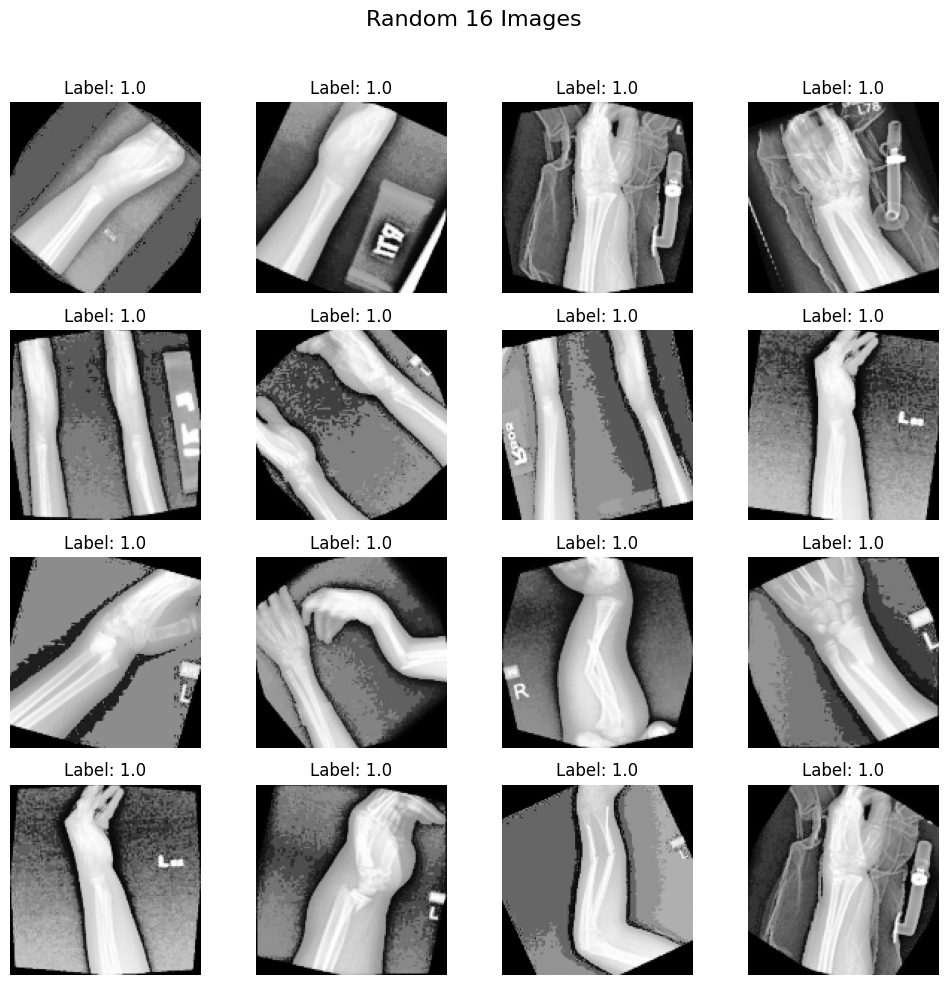

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("Random 16 Images", fontsize=16)

for i, ax in enumerate(axes.flat):
    # Assuming your DataFrame has pixel data in all columns except the last one
    img = df.iloc[i, :-1].values.reshape(128, 128)
    label = df.iloc[i, -1]
    ax.imshow(img, cmap='gray')  # grayscale
    ax.axis('off')
    ax.set_title(f"Label: {label}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
print(df.iloc[:, -1].value_counts())

16384
1.0    4840
0.0    4623
Name: count, dtype: int64


In [ ]:
import os
print(os.listdir(os.path.join(train_dir, 'not fractured')))

['70-rotated3-rotated2-rotated2.jpg', '26-rotated3-rotated2-rotated2.jpg', '68-rotated1-rotated1.jpg', '28-rotated2-rotated1-rotated2.jpg', '19-rotated3-rotated1-rotated3.jpg', '40-rotated3-rotated1-rotated3.jpg', '6-rotated3-rotated1-rotated2-rotated1.jpg', '28-rotated3-rotated1-rotated2.jpg', '22-rotated3.jpg', '50-rotated2-rotated1.jpg', '51-rotated2-rotated2-rotated3-rotated1.jpg', '25-rotated3-rotated1-rotated1.jpg', '59-rotated1-rotated2-rotated1-rotated1.jpg', '57-rotated2-rotated1.jpg', '35-rotated2-rotated2-rotated3.jpg', '47-rotated2.jpg', '50-rotated1-rotated2-rotated1.jpg', '31-rotated1-rotated1-rotated1-rotated1.jpg', '15-rotated2-rotated2-rotated2-rotated1.jpg', '30-rotated1-rotated3-rotated1.jpg', '20-rotated1-rotated1-rotated3.jpg', '64-rotated3-rotated2-rotated2.jpg', '15-rotated1-rotated3-rotated1.jpg', '34-rotated2-rotated3-rotated3.jpg', '38-rotated3-rotated1-rotated1.jpg', '30-rotated3-rotated1-rotated2-rotated1.jpg', '40-rotated1-rotated1-rotated1-rotated1.jpg', '

In [ ]:
#train test split
X = df.iloc[: , :-1].values
y = df.iloc[: , -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )


In [ ]:
max_pixel = df.iloc[:,:-1].max().max()
print("Maximum pixel value :", max_pixel)

Maximum pixel value : 1.0


In [ ]:
X_train

array([[0.2627451 , 0.43529412, 0.21176471, ..., 0.57254902, 0.58823529,
        0.58431373],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.29019608, ..., 0.29019608, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X_test


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27843137, 0.27843137, 0.27843137, ..., 0.27843137, 0.27843137,
        0.27843137],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.00784314, 0.        , ..., 0.        , 0.        ,
        0.00392157],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
#Create CustomDataset Class
class CustomDataset(Dataset):
  def __init__(self, features, labels) :
    self.features = torch.tensor(features, dtype = torch.float32)
    self.labels = torch.tensor(labels, dtype = torch.long)
  def __len__(self):
    return len(self.features)
  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [ ]:
#create train_dataset object
train_dataset = CustomDataset(X_train,y_train)

In [ ]:
train_dataset[0]

(tensor([0.2627, 0.4353, 0.2118,  ..., 0.5725, 0.5882, 0.5843]), tensor(1))

In [ ]:
#create test_dataset object
test_dataset = CustomDataset(X_test, y_test)

In [ ]:
test_dataset[0]

(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(1))

In [ ]:
class myNN(nn.Module):
  def __init__(self, input_dim, output_dim, num_hidden_layers, neurons_per_layer, dropout_rate) :
    super().__init__()
    layers = []

    for i in range(num_hidden_layers) :
        layers.append(nn.Linear(input_dim, neurons_per_layer))
        layers.append(nn.BatchNorm1d(neurons_per_layer))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(dropout_rate))
        input_dim = neurons_per_layer
    layers.append(nn.Linear(neurons_per_layer, output_dim))

    self.model = nn.Sequential(*layers)

  def forward(self, x) :
    return self.model(x)

In [ ]:
def objective(trial):

  num_hidden_layers = trial.suggest_int("num_hidden_layers",1,5)
  neurons_per_layer = trial.suggest_int("neurons_per_layer", low=256, high=1024, step=256)
  epochs = trial.suggest_int("epochs", 10,60,step = 10)
  learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
  dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step = 0.1)
  batch_size = trial.suggest_categorical("batch_size", [32, 64])
  optimizer_name = trial.suggest_categorical("optimizer", ['Adam', 'SGD','RMSprop'])
  weight_decay = trial.suggest_float("weight_decay", 1e-5 , 1e-3 , log = True)

  train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
  test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False )

  input_dim = 16384
  output_dim = 1

  model = myNN(input_dim, output_dim, num_hidden_layers, neurons_per_layer, dropout_rate)
  model.to(device)

  loss_function = nn.BCEWithLogitsLoss()
  optimizer = optim.SGD(model.parameters(), lr= learning_rate, weight_decay = 1e-4)

  if optimizer_name == 'Adam' :
    optimizer = optim.Adam(model.parameters(), lr= learning_rate, weight_decay = weight_decay)
  elif optimizer_name == 'SGD' :
    optimizer = optim.SGD(model.parameters(), lr= learning_rate, weight_decay = weight_decay)
  else :
    optimizer = optim.RMSprop(model.parameters(), lr= learning_rate, weight_decay = weight_decay)



  for epoch in range(epochs):

    for batch_features, batch_labels in train_loader :

       batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

       batch_features = batch_features.view(batch_features.size(0), -1)

       # adjust shape and type
       batch_labels = batch_labels.float().unsqueeze(1)

       #forward pass
       outputs = model(batch_features)

       #calculate loss
       loss = loss_function(outputs, batch_labels)

       #back pass
       optimizer.zero_grad()
       loss.backward()

       #update grads
       optimizer.step()

       torch.cuda.empty_cache()


  model.eval()

  total = 0
  correct = 0

  with torch.no_grad():

    for batch_features, batch_labels in test_loader:

      batch_features = batch_features.to(device)
      batch_labels = batch_labels.to(device).float().unsqueeze(1)

      outputs = torch.sigmoid(model(batch_features))
      predicted = (outputs >= 0.5).float()

      # Flatten for comparison
      predicted = predicted.view(-1)
      batch_labels = batch_labels.view(-1)

      total += batch_labels.size(0)
      correct += (predicted == batch_labels).sum().item()

  accuracy = correct / total

  return accuracy  #Optuna expects a float here!

In [ ]:
!pip install optuna

In [ ]:
import optuna


In [ ]:
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 10)

[I 2025-06-25 06:25:53,052] A new study created in memory with name: no-name-dc7857b1-3288-4d32-934c-182bf47c8721
[I 2025-06-25 06:27:17,928] Trial 0 finished with value: 0.9667194928684627 and parameters: {'num_hidden_layers': 2, 'neurons_per_layer': 1024, 'epochs': 50, 'learning_rate': 0.06982864892150689, 'dropout_rate': 0.4, 'batch_size': 32, 'optimizer': 'SGD', 'weight_decay': 4.4948626762566554e-05}. Best is trial 0 with value: 0.9667194928684627.
[I 2025-06-25 06:28:51,475] Trial 1 finished with value: 0.9915478077126255 and parameters: {'num_hidden_layers': 3, 'neurons_per_layer': 768, 'epochs': 60, 'learning_rate': 0.00024112596615015648, 'dropout_rate': 0.1, 'batch_size': 64, 'optimizer': 'Adam', 'weight_decay': 9.905404555393598e-05}. Best is trial 1 with value: 0.9915478077126255.
[I 2025-06-25 06:30:45,884] Trial 2 finished with value: 0.9873217115689382 and parameters: {'num_hidden_layers': 5, 'neurons_per_layer': 256, 'epochs': 60, 'learning_rate': 3.7602178167930845e-05

In [ ]:
study.best_value

0.9915478077126255

In [ ]:
study.best_params

{'num_hidden_layers': 3,
 'neurons_per_layer': 768,
 'epochs': 60,
 'learning_rate': 0.00024112596615015648,
 'dropout_rate': 0.1,
 'batch_size': 64,
 'optimizer': 'Adam',
 'weight_decay': 9.905404555393598e-05}

In [ ]:
# Rebuild best model using best parameters
best_params = study.best_trial.params

model = myNN(
    input_dim=16384,
    output_dim=1,
    num_hidden_layers=best_params['num_hidden_layers'],
    neurons_per_layer=best_params['neurons_per_layer'],
    dropout_rate=best_params['dropout_rate']
)
model.to(device)

# Save model
torch.save(model.state_dict(), "best_model.pth")



In [ ]:
# Get best params
best_params = study.best_trial.params

# Recreate model
model = myNN(
    input_dim=16384,
    output_dim=1,
    num_hidden_layers=best_params['num_hidden_layers'],
    neurons_per_layer=best_params['neurons_per_layer'],
    dropout_rate=best_params['dropout_rate']
).to(device)

# Choose optimizer
if best_params["optimizer"] == "Adam":
    optimizer = torch.optim.Adam(model.parameters(), lr=best_params["learning_rate"], weight_decay=best_params["weight_decay"])
elif best_params["optimizer"] == "SGD":
    optimizer = torch.optim.SGD(model.parameters(), lr=best_params["learning_rate"], weight_decay=best_params["weight_decay"])
else:
    optimizer = torch.optim.RMSprop(model.parameters(), lr=best_params["learning_rate"], weight_decay=best_params["weight_decay"])

loss_function = nn.BCEWithLogitsLoss()
epochs = best_params['epochs']
batch_size = best_params['batch_size']

# Create updated DataLoaders with best batch_size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Train model
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for batch_features, batch_labels in train_loader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
        batch_labels = batch_labels.float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(batch_features)
        loss = loss_function(outputs, batch_labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) >= 0.5).float()
        correct += (predicted == batch_labels).sum().item()
        total += batch_labels.size(0)

    train_losses.append(total_loss / len(train_loader))
    train_accuracies.append(correct / total)

    # Evaluate on test data
    model.eval()
    with torch.no_grad():
        total_test_loss = 0
        correct_test = 0
        total_test = 0

        for batch_features, batch_labels in test_loader:
            batch_features, batch_labels = batch_features.to(device), batch_labels.to(device).float().unsqueeze(1)
            outputs = model(batch_features)
            loss = loss_function(outputs, batch_labels)
            total_test_loss += loss.item()

            predicted = (torch.sigmoid(outputs) >= 0.5).float()
            correct_test += (predicted == batch_labels).sum().item()
            total_test += batch_labels.size(0)

        test_losses.append(total_test_loss / len(test_loader))
        test_accuracies.append(correct_test / total_test)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Acc: {test_accuracies[-1]:.4f}")


    torch.cuda.empty_cache()




Epoch 1/60, Train Loss: 0.4076, Train Acc: 0.8095, Test Loss: 0.6530, Test Acc: 0.6846
Epoch 2/60, Train Loss: 0.1559, Train Acc: 0.9417, Test Loss: 0.4644, Test Acc: 0.7993
Epoch 3/60, Train Loss: 0.0850, Train Acc: 0.9712, Test Loss: 0.0708, Test Acc: 0.9736
Epoch 4/60, Train Loss: 0.0476, Train Acc: 0.9856, Test Loss: 0.0669, Test Acc: 0.9794
Epoch 5/60, Train Loss: 0.0546, Train Acc: 0.9797, Test Loss: 0.4076, Test Acc: 0.8611
Epoch 6/60, Train Loss: 0.0544, Train Acc: 0.9808, Test Loss: 0.0751, Test Acc: 0.9688
Epoch 7/60, Train Loss: 0.0298, Train Acc: 0.9901, Test Loss: 0.0736, Test Acc: 0.9704
Epoch 8/60, Train Loss: 0.0227, Train Acc: 0.9915, Test Loss: 0.0588, Test Acc: 0.9762
Epoch 9/60, Train Loss: 0.0304, Train Acc: 0.9890, Test Loss: 0.3948, Test Acc: 0.8859
Epoch 10/60, Train Loss: 0.0370, Train Acc: 0.9881, Test Loss: 0.0663, Test Acc: 0.9757
Epoch 11/60, Train Loss: 0.0413, Train Acc: 0.9857, Test Loss: 0.0415, Test Acc: 0.9826
Epoch 12/60, Train Loss: 0.0274, Train Ac

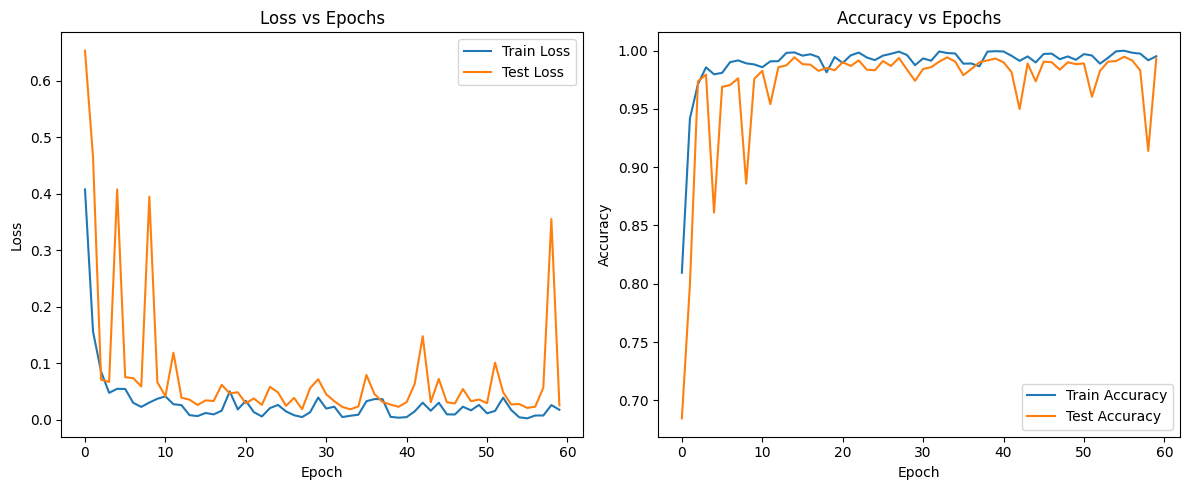

In [ ]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, f1_score,
    roc_auc_score, matthews_corrcoef, balanced_accuracy_score
)


In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        batch_features = batch_features.to(device)
        batch_labels = batch_labels.to(device).float().unsqueeze(1)

        outputs = torch.sigmoid(model(batch_features))  # Because you're using BCEWithLogitsLoss
        preds = (outputs >= 0.5).float()

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch_labels.cpu().numpy())

# Convert to numpy arrays
import numpy as np
all_preds = np.array(all_preds).flatten()
all_labels = np.array(all_labels).flatten()

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(all_labels, all_preds).ravel()

# Metrics
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
balanced_acc = balanced_accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
roc_auc = roc_auc_score(all_labels, all_preds)
mcc = matthews_corrcoef(all_labels, all_preds)

# Print results
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Matthews CorrCoef (MCC): {mcc:.4f}")


Sensitivity (Recall): 0.9968
Specificity: 0.9894
Balanced Accuracy: 0.9931
Precision: 0.9896
F1-score: 0.9932
ROC-AUC: 0.9931
Matthews CorrCoef (MCC): 0.9863


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


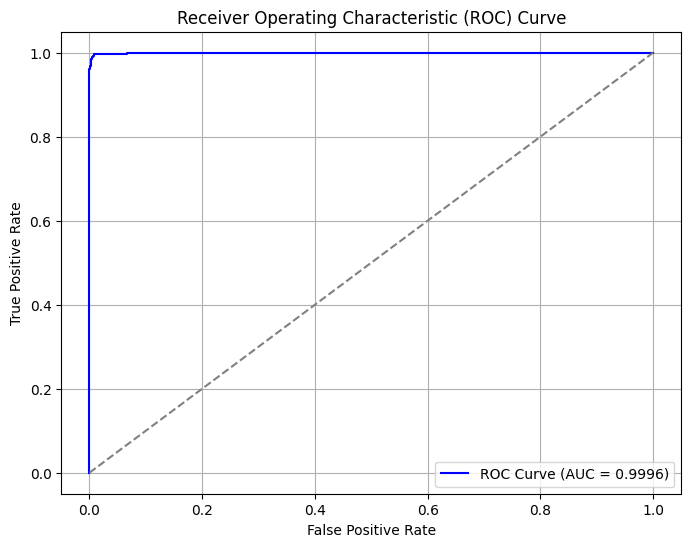

In [ ]:
model.eval()
all_probs = []
all_labels = []

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        batch_features = batch_features.to(device)
        batch_labels = batch_labels.to(device).float().unsqueeze(1)

        outputs = torch.sigmoid(model(batch_features))  # Get probabilities
        all_probs.extend(outputs.cpu().numpy())
        all_labels.extend(batch_labels.cpu().numpy())

# Convert to numpy arrays
import numpy as np
all_probs = np.array(all_probs).flatten()
all_labels = np.array(all_labels).flatten()

# Get ROC curve values
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
roc_auc = roc_auc_score(all_labels, all_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


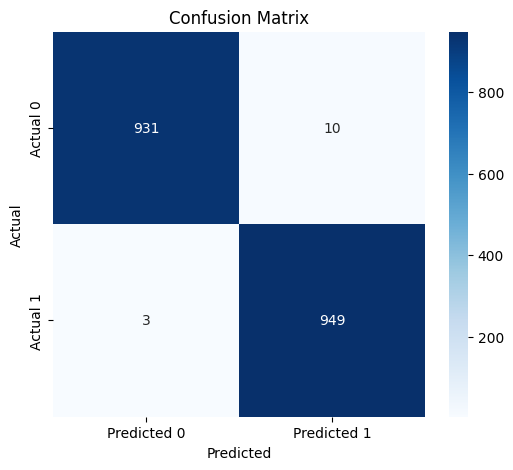

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Binarize predictions for confusion matrix
preds_binary = (all_probs >= 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(all_labels, preds_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
total_test_samples = 0
for batch_features, batch_labels in test_loader:
    total_test_samples += batch_labels.size(0)

print(f"Number of samples in test_loader: {total_test_samples}")


Number of samples in test_loader: 1893
